### 不同坐标系统空间数据可视化（Cartopy）


In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import rasterio


**投影坐标系可视化**

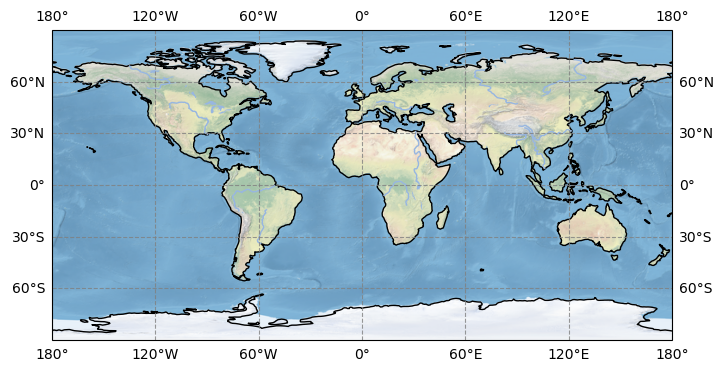

In [4]:
proj = ccrs.PlateCarree()     ### platecarree为等距圆柱投影。该坐标系与地理坐标系近似, 因此可以用经纬度在地图上表示位置。
### 需用add_subplot(), 用add_axes()不能设置projection参数。
# fig = plt.figure()
# ax = fig.add_subplot(projection=proj)   
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': proj})  ### 直接在subplots()中设置投影类型
ax.set_extent([-180, 180, -90, 90])
ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.8)



Text(0.5, 1.0, 'Orthographic Projection')

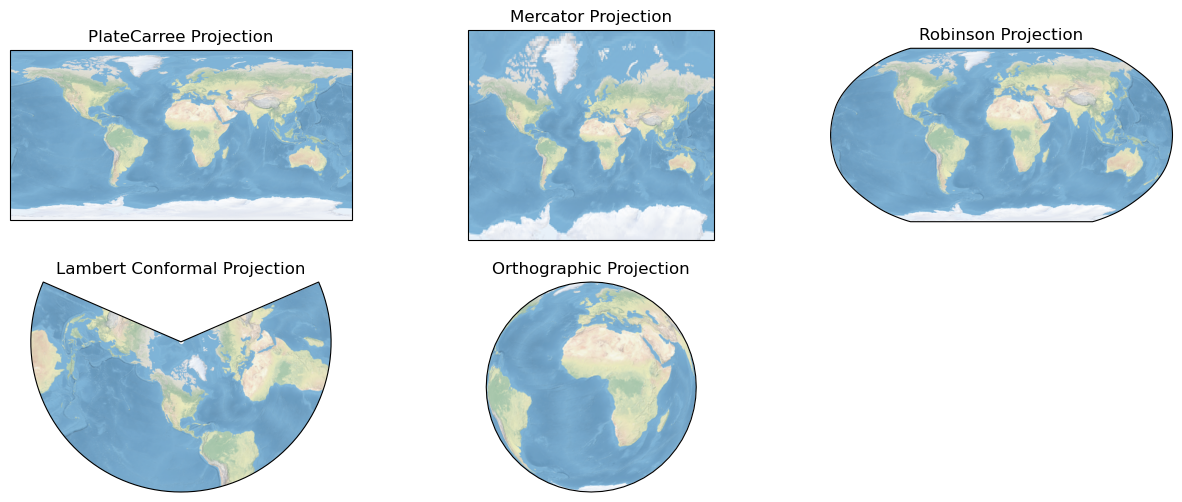

In [5]:
### 多种坐标系可视化对比
proj1 = ccrs.PlateCarree()  # 等距圆柱投影
proj2 = ccrs.Mercator()     # 墨卡托投影
proj3 = ccrs.Robinson()     # 罗宾森投影，伪圆柱投影
proj4 = ccrs.LambertConformal()  # 兰伯特等距投影
proj5 = ccrs.Orthographic()      # 正射投影

# 示例：创建三个不同投影的子图
fig = plt.figure(figsize=(15, 6))
# 子图1 - 等距圆柱投影（经纬度网格），cartopy默认投影
ax1 = fig.add_subplot(2,3,1, projection=proj1)
ax1.stock_img()  # 添加底图
ax1.set_title('PlateCarree Projection')
# 子图2 - 墨卡托投影（常用导航）
ax2 = fig.add_subplot(2,3,2, projection=proj2)
ax2.stock_img()  # 添加底图
ax2.set_title('Mercator Projection')
# 子图3 - 罗宾森投影（全球均衡）
ax3 = fig.add_subplot(2,3,3, projection=proj3)
ax3.stock_img()  # 添加底图
ax3.set_title('Robinson Projection')
# 子图4 - 兰伯特投影
ax4 = fig.add_subplot(2,3,4, projection=proj4)
ax4.stock_img()  # 添加底图
ax4.set_title('Lambert Conformal Projection')
# 子图3 - 正射投影（地球仪效果）
ax5 = fig.add_subplot(2,3,5, projection=proj5)
ax5.stock_img()  # 添加底图
ax5.set_title('Orthographic Projection')

**不同坐标系在同一幅图中显示：cartopy transform功能使用**

In [6]:
path_vec = 'data/data-base/ChinaAdminDivisonSHP/2. Province/province.shp'
path_vec_utm48 = 'data/data-section-4/province_wgs84_utm48.gpkg'
path_raster = 'data/data-section-4/rsimg_wgs84_utm45_gdal.tif'
vec_china = gpd.read_file(path_vec)
vec_china_utm48 = gpd.read_file(path_vec_utm48)


c:\Users\HP\miniconda3\envs\myenv\Lib\site-packages\pyogrio\core.py:36: RuntimeWarning: Could not detect PROJ data files.  Set PROJ_LIB environment variable to the correct path.
  _init_proj_data()


PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


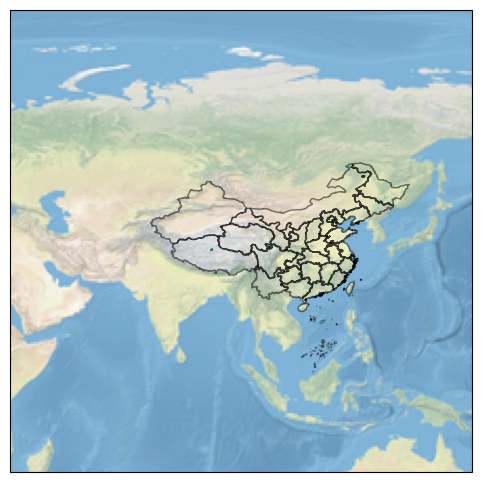

In [ ]:
proj_utm45=ccrs.UTM(zone=45, southern_hemisphere=False)
proj_utm48=ccrs.UTM(zone=48, southern_hemisphere=False)
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': proj})
ax.stock_img()
vec_china.plot(ax=ax, facecolor='none', alpha=0.5)  ### 直接用geopandas读取shp文件
# vec_china_utm48.plot(ax=ax, facecolor='none', alpha=0.5, transform=proj_utm48)  ### 直接用geopandas读取shp文件
with rasterio.open(path_raster) as rsimg:
    rsimg_arr = rsimg.read(1)
    rsimg_crs = rsimg.crs
    left, bottom, right, top = rsimg.bounds
print(rsimg_crs)

ax.imshow(rsimg_arr, vmax=3000, vmin=0, transform=proj_utm45, extent=(left, right, bottom, top))
ax.set_extent([40, 150, -20, 90], crs=proj)

